In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
pd.set_option('display.max_columns', 130)
sns.set(style="white", color_codes=True)
from IPython.display import HTML
import squarify
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [129]:
data_org=pd.read_csv('loan.csv',low_memory=False)
data=data_org
print(data.shape)

(39717, 111)


In [130]:
#We have one class label loan_status
data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We have imabalanced data here.3 types of loan status found here.

In [131]:
#WE had 111 columns in our original dataset
#From the data - we had 44 columns which had all data null
#We remove those columns straight away from our data 
#Now shape is redued to 39717 rows and 57 columns

data.drop(data.columns[data.isnull().sum()==data.shape[0]],axis=1,inplace=True)
data.shape

(39717, 57)

In [132]:
#let us check which columns are left after the removal of all null colummns
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [133]:
#Check distinct number of entries in our left over dataset
data.apply(pd.Series.nunique)

#Here we can see that id, member_id, url are having all distinct values 
#id and memberid are uniqur ids , for our analysis we dont need them
#we can see that url is also having all different values - also it indicates loan certificate so we dont need it


id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28821
emp_length                       12
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26528
purpose                          14
title                         19616
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [134]:

#let us remove all this three columns

data.drop(['id','member_id','url'],axis=1,inplace=True)
data.shape

(39717, 54)

In [135]:
#Let us focus on columns which have same data  across whole data set.
data.columns[data.apply(pd.Series.nunique)==1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [136]:
#remove all those columns which have same data 
data.drop(data.columns[data.apply(pd.Series.nunique)==1],axis=1,inplace=True)
data.shape
#Now we are left with 45 columns 

(39717, 45)

In [137]:
#We can see that desc column is filled by borrower, and description regarindg loan is given in it
#This column is not required for our analysis
#We will remove it form data
data.desc.head(10)

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
5                                                  NaN
6      Borrower added on 12/18/11 > I am planning o...
7      Borrower added on 12/16/11 > Downpayment for...
8      Borrower added on 12/21/11 > I own a small h...
9      Borrower added on 12/16/11 > I'm trying to b...
Name: desc, dtype: object

In [138]:
data.drop('desc',axis=1,inplace=True)
data.shape
#now we have 44 columns for our analysis

(39717, 44)

In [139]:
#let us check purpose and title
#by looking at the description of purpose and title in metadata
#First we will check what is the difference between two of them

print(data[['title','purpose']].head(10)) 
#purpose seems to have definite data - from group of 14 categories
#title is same as purpose- only difference is that it is entered by user
#So we can remove title from our data

                                   title             purpose
0                               Computer         credit_card
1                                   bike                 car
2                   real estate business      small_business
3                               personel               other
4                               Personal               other
5  My wedding loan I promise to pay back             wedding
6                                   Loan  debt_consolidation
7                        Car Downpayment                 car
8   Expand Business & Buy Debt Portfolio      small_business
9            Building my credit history.               other


In [140]:
data.drop('title',inplace=True,axis=1)
data.shape
#We have now 43 columns

(39717, 43)

In [141]:
# We have some features here which will be added once the loan get funded.
# Those features won't going to help in making decesion to approve loan or reject loan.
# We won't have those features when new loan application come.
# so we will remove all those variables.

remove_col_1= ['next_pymnt_d','out_prncp_inv']
data.drop(remove_col_1,inplace=True,axis=1)
data.shape

(39717, 41)

In [142]:

print(data[['loan_amnt','funded_amnt','funded_amnt_inv','total_pymnt','total_pymnt_inv']].head())
#total_amount_inv and funded_amount_inv are related to what investors will get and what they will invest respecively.
#As we are looking at the total amount funded to borrower irrespective of who provided it and how much he/she provided it
#We will removw funded-inv and total_inv 

data.drop(['funded_amnt_inv','total_pymnt_inv'],inplace=True,axis=1)
data.shape

#Now we have 40 columns

   loan_amnt  funded_amnt  funded_amnt_inv   total_pymnt  total_pymnt_inv
0       5000         5000           4975.0   5863.155187          5833.84
1       2500         2500           2500.0   1008.710000          1008.71
2       2400         2400           2400.0   3005.666844          3005.67
3      10000        10000          10000.0  12231.890000         12231.89
4       3000         3000           3000.0   3513.330000          3513.33


(39717, 39)

In [143]:
#In data set column emp_title has vague data, filled up by borrower and mostt values are null
#as per below analysis
emp_title_count = Counter(list(data['emp_title']))
emp_title_count.most_common(15)

[(nan, 2458),
 ('US Army', 134),
 ('Bank of America', 109),
 ('IBM', 66),
 ('AT&T', 59),
 ('Kaiser Permanente', 56),
 ('USAF', 54),
 ('Wells Fargo', 54),
 ('UPS', 53),
 ('US Air Force', 52),
 ('Walmart', 45),
 ('Lockheed Martin', 44),
 ('United States Air Force', 42),
 ('State of California', 42),
 ('U.S. Army', 41)]

In [144]:
#We will drop emp_title column
data.drop('emp_title',axis=1,inplace=True)
data.shape

(39717, 38)

In [145]:
data[['loan_amnt','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee']].head(5)
#By looking at the data we can see that, total_payment= total_rec_principal+total_rec_interest+total_late fees
#As we already have interest % in data 
#We dont need explicit distinction of all these columns
#We will remove total_rec_prncp, total_rec_int, total_rec_late_fee


,loan_amnt,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee
0,5000,5863.155187,5000.00,863.16,0.00
1,2500,1008.710000,456.46,435.17,0.00
2,2400,3005.666844,2400.00,605.67,0.00
3,10000,12231.890000,10000.00,2214.92,16.97
4,3000,3513.330000,2475.94,1037.39,0.00


In [146]:
data.drop(['total_rec_int','total_rec_prncp','total_rec_late_fee'],axis=1,inplace=True)
data.shape

(39717, 35)

In [147]:
data.isnull().sum()

loan_amnt                      0
funded_amnt                    0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
total_pymnt                    0
recoveries                     0
collection

In [148]:
#We do not need last payment amount and last payment date, as we already have total payment done 
#against the loan amount.also these are future reference columns.
data.drop(['last_pymnt_amnt','last_pymnt_d'],inplace=True,axis=1)
data.shape

(39717, 33)

In [149]:
pd.crosstab(index=data['zip_code'],columns=data['loan_status'])

loan_status,Charged Off,Current,Fully Paid
zip_code,,,
007xx,0,0,1
010xx,14,2,84
011xx,1,0,13
012xx,1,1,12
013xx,3,1,10
014xx,7,1,25
015xx,10,1,51
016xx,1,1,22
017xx,5,0,74


In [150]:
# funded_amnt — this data only we get after loan approved/rejected
# sub_grade — redundant information (we can use grade column)
# int_rate — decide from grade column
# issued_d - this is useful after loan get funded
# zip_code - we have state code so we can use that and also zipcode has many unique values which seems not so much useful
# out_prncp - this data only we get after loan  funded
# total_pymnt-this data only we get after loan  funded
# recoveries- this data only we get after loan  funded
# collection_recovery_fee-this data only we get after loan funded
remove_col_2=['funded_amnt','sub_grade','issue_d','zip_code','out_prncp', 'total_pymnt', 'recoveries', 'collection_recovery_fee']	

In [151]:
data.drop(remove_col_2,inplace=True,axis=1)
data.shape

(39717, 25)

In [152]:
null_data = data.isnull().sum()
null_data

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    25682
mths_since_last_record    36931
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
last_credit_pull_d            2
pub_rec_bankruptcies        697
dtype: int64

In [153]:
data[['mths_since_last_delinq', 'mths_since_last_record','pub_rec_bankruptcies']].isnull().sum()
#We can see that most of the values in mths_since_last_record is null
#null values in bankruptcies is less,but there is no way we can impute data in it so we will discard it
#months_since_last_delinq also has most data null, so we will discard it

mths_since_last_delinq    25682
mths_since_last_record    36931
pub_rec_bankruptcies        697
dtype: int64

In [154]:
data.drop(['mths_since_last_delinq', 'mths_since_last_record','pub_rec_bankruptcies'],inplace=True,axis=1)
data.shape
#Now we have 22 columns left with us

(39717, 22)

In [155]:
data.columns[data.isnull().sum()>0]
#2 columns with null values

print(" Null data in revol util is",data['revol_util'].isnull().sum() ,"\n Null data last_credit_pull_d is",data['last_credit_pull_d'].isnull().sum())
#We will remove 52 rows from our data to get rid of this null values

 Null data in revol util is 50 
 Null data last_credit_pull_d is 2


In [156]:
data.drop(data.loc[data['revol_util'].isnull()>0,:].index,axis=0,inplace=True)
data.drop(data.loc[data['last_credit_pull_d'].isnull()>0,:].index,axis=0,inplace=True)

In [157]:
data.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
dtype: int64

In [158]:
#we have '%' sign in two columns(revol_util,int_rate) which are not needed we can convert them in to numeric columns
data['revol_util'] = data['revol_util'].str.rstrip('%').astype('float')
data['int_rate'] = data['int_rate'].str.rstrip('%').astype('float')


<b>Loan status Analysis</b>

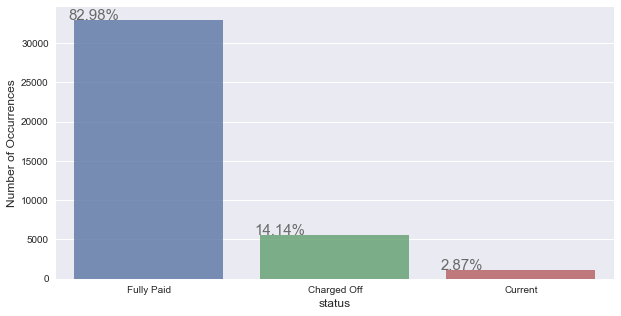

In [159]:
#lets do some analysis on each variable

loan_status_count=data['loan_status'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
d=sns.barplot(loan_status_count.index, loan_status_count.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('status', fontsize=12)

totals = []

# find the values and append to list
for i in d.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in d.patches:
    d.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

<b>here we can see that data is imablanced.we have more data of fully paid loan.</b>

<h1><b>home ownership Analysis</b></h1>

In [160]:
#lets see relations between home_ownership and loan status
loan_home_table = pd.crosstab(index=data["home_ownership"], 
                          columns=data["loan_status"]).sort_values('Fully Paid', ascending=True)

loan_home_table

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
NONE,0,0,3
OTHER,18,0,78
OWN,441,83,2529
MORTGAGE,2323,638,14686
RENT,2828,419,15619


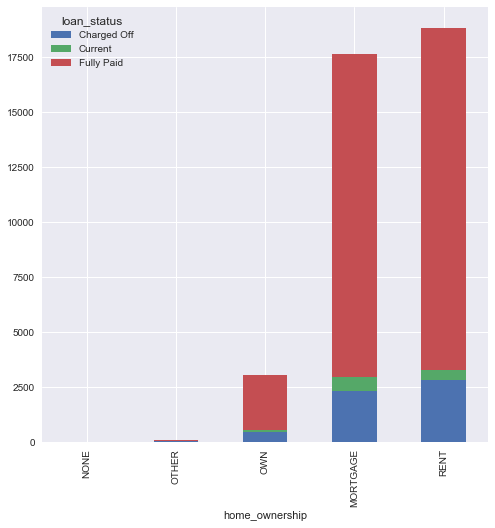

In [161]:
loan_home_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

<b>We can observe one thing here those people who owns home chances of charged off is less so we can have this one feature on which we can consider in list of  predict variable</b>

<h1><b>Number of Open accounts</b></h1>

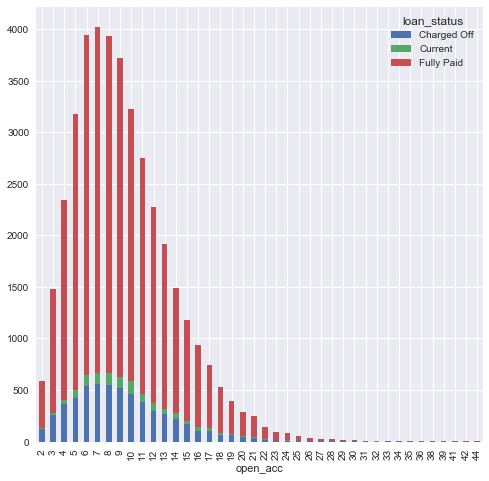

In [162]:
account_table = pd.crosstab(index=data["open_acc"], 
                          columns=data["loan_status"])

account_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

<b>We can say that minimum number of 2 accounts needed to get loan approved.no of accounts 3 to 5 have more fully loan paid and less charged off.again after 8 charged off chances becoming less but we are not able to conclude exactly anything from this.</b>

<h1><b>Employee length Analysis</b></h1>   

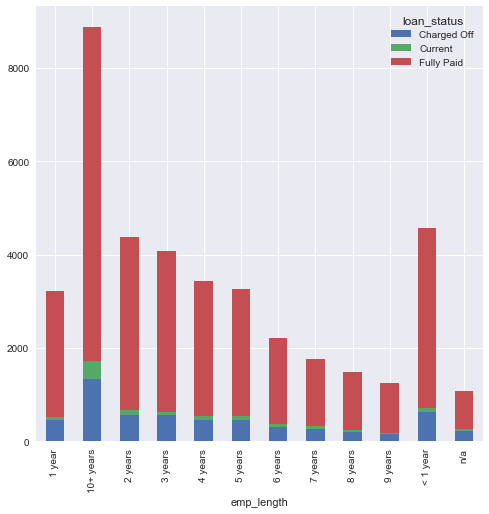

In [163]:
#lets analyse if emp_length is more then charged off less?

emp_table = pd.crosstab(index=data["emp_length"], 
                          columns=data["loan_status"])

emp_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)


<b>from the chart we can say that less than 3 year(2 year ,1 year,less than 1 year or n/a(may be some business persons) has more charged off applications.
we can also include this variable to predict varible list.</b>

In [164]:
#We do not need current status data in loan status for our analysis
data=data[data['loan_status'].isin(['Fully Paid','Charged Off'])]
data.shape

(38525, 22)

In [165]:
#Process emp_lenth - make it numerics
data['emp_length']=data.emp_length.replace({'10+ years' : 10,
                          '< 1 year' : 1, 'n/a':0})
data['emp_length']=data.emp_length.apply(lambda c:str(c).replace('years',''))
data['emp_length']=data.emp_length.apply(lambda c:str(c).replace('year',''))
 
data['emp_length']=data['emp_length'].apply(pd.to_numeric)


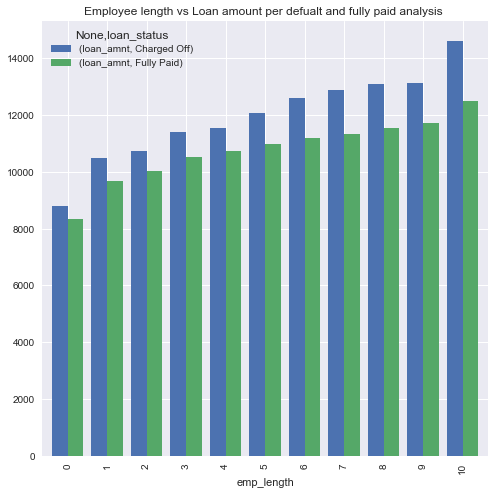

In [166]:
#We can relate loan amount to term, grade, installment, anuual income
# plt.figure(figsize=(8,8))
table =data.pivot_table(values=['loan_amnt'], columns=['loan_status'] ,index=['emp_length'], aggfunc=np.mean)

table.plot(figsize=(8,8),kind='bar',width=0.8,title='Employee length vs Loan amount per defualt and fully paid analysis ')

<b>we can see from above graph that as the employee length increases ,loan amount increases and along with that chances of charged off is also increases.So we are not to the conclusion that it will affect decesion or not so will not include this in predict variable list</b>

<h1><b>Grade Analysis</b></h1>   

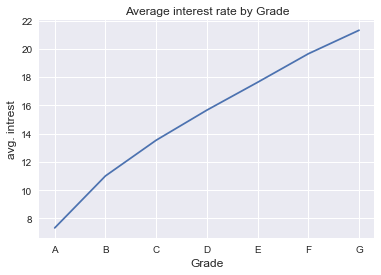

In [167]:

p=data.groupby(['grade'])['int_rate'].mean()
sns.set_style("darkgrid")
plt.ylabel('avg. intrest', fontsize=12)
plt.xlabel('Grade', fontsize=12)
plt.title("Average interest rate by Grade")
plt.plot(p)
plt.show()

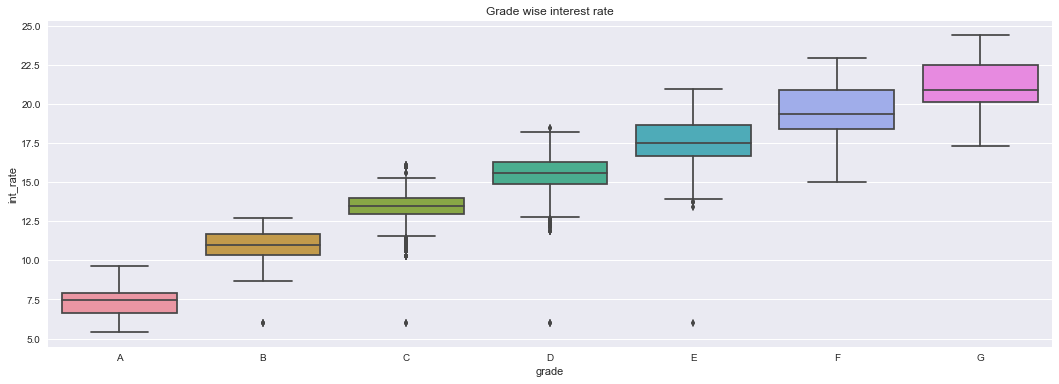

In [168]:
fig, axs = plt.subplots(figsize=(18,6)) 
sns.boxplot(x='grade', y='int_rate', data=data, order = 'ABCDEFG')
plt.title("Grade wise interest rate")
plt.show()

<b>here we can see that as the grade increases interest also increases.if we see grade C and Grade G we can observe minimum interest in grade G is more than maximum interest in grade C</b>

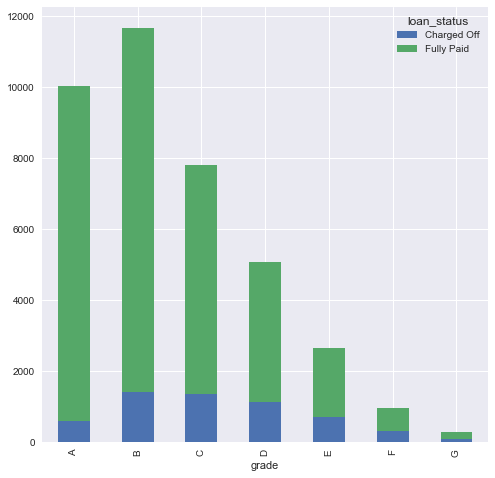

In [169]:
grade_table = pd.crosstab(index=data["grade"], 
                          columns=data["loan_status"])

grade_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

<b>As the grade increases,chances of risk are high which we can even see from above chart also.so for higher grade interest rate is also high.here Compare to A grade other increasing grades has more charged off transactions.</b>

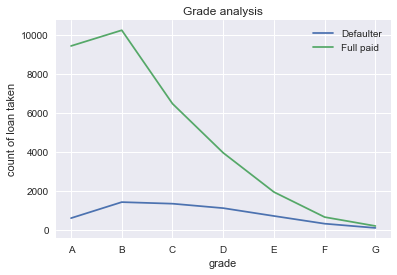

In [170]:
data_default=data[data['loan_status']=='Charged Off']
data_FullPaid=data[data['loan_status']=='Fully Paid']
grade_default= pd.DataFrame(data_default.groupby('grade').term.count())
grade_fullPaid= pd.DataFrame(data_FullPaid.groupby('grade').term.count())


plt.plot(grade_default.index, grade_default.term, label='Defaulter', markersize=10)
plt.plot(grade_fullPaid.index, grade_fullPaid.term, label='Full paid',markersize=10)
plt.title('Grade analysis')
plt.legend(loc='best')
plt.ylabel('count of loan taken')
plt.xlabel('grade')
plt.show()  

<b>We can see that B has higher number of defualter as compared to other grades around 2000 loans are defualted which fell under grade B.</b>

<h1><b>Term Analysis</b></h1>   

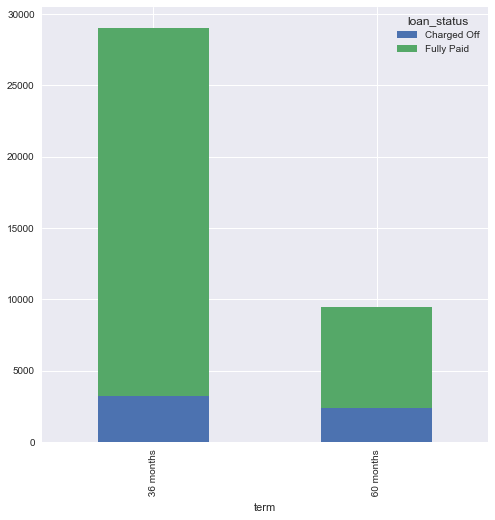

In [171]:
term_table = pd.crosstab(index=data["term"], 
                          columns=data["loan_status"])

term_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

<b>We are not getting much information from above plot both are almost equal charged off
but we can say that there is no on going loan in 36 months term</b>

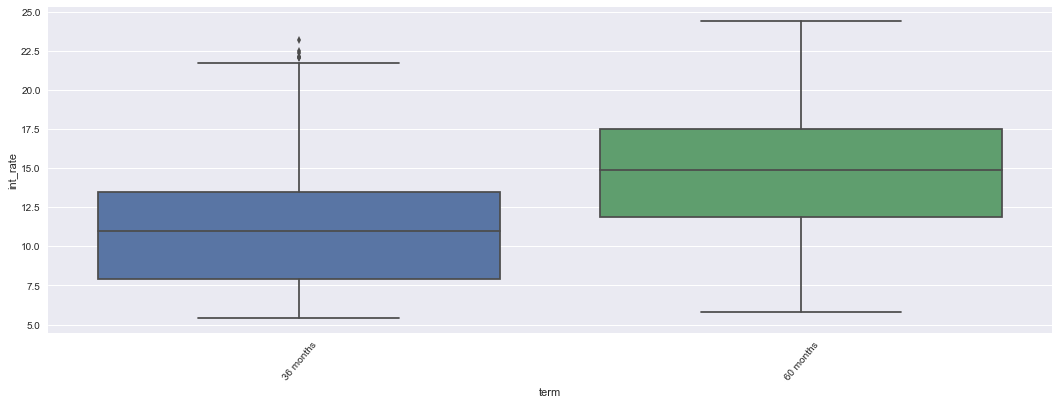

In [172]:
fig, axs = plt.subplots(figsize=(18,6)) 

sns.boxplot(x='term', y='int_rate', data=data)

plt.xticks(rotation=50)



plt.show()

<b>from the box plot we can say that 60 months loan has more interest rate than 36 months period loan.</b>

In [173]:
print("Column description of loan amounts \n",data.loan_amnt.describe(),"\n---------------------\n Median of loan amount is",data.loan_amnt.median())

Column description of loan amounts 
 count    38525.000000
mean     11055.683323
std       7348.380985
min        500.000000
25%       5325.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64 
---------------------
 Median of loan amount is 9600.0


<b>As medin and mean of loan amounts are almost same we can conclude that loan amount column has no outlier</b>

In [174]:
#we are seprating data for defaulters and fully paid loans
data_default=data[data['loan_status']=='Charged Off']
data_FullPaid=data[data['loan_status']=='Fully Paid']

<h1><b>Loan Purpose Analysis</b></h1>   

In [175]:
count_purpose=pd.DataFrame(data_default.groupby('purpose').loan_status.count()) 
countPaid_purpose=pd.DataFrame(data_FullPaid.groupby('purpose').loan_status.count()) 

(0.0, 100.0, 0.0, 100.0)

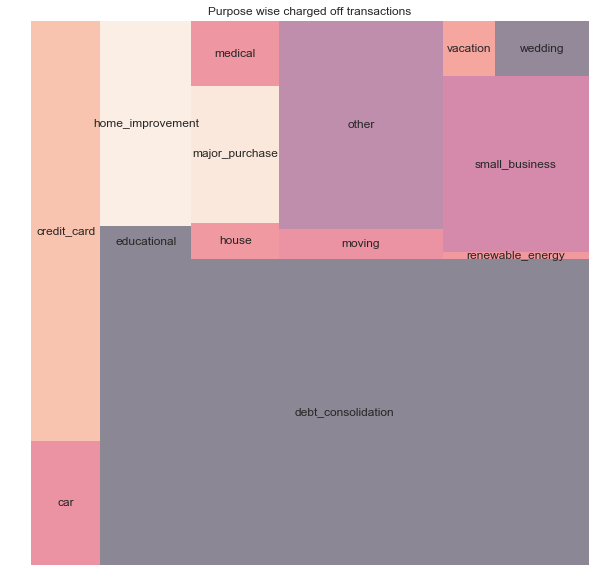

In [176]:
plt.figure(figsize=(10,10))
squarify.plot(sizes=count_purpose.loan_status, label=count_purpose.index,alpha=0.5 )
plt.title("Purpose wise charged off transactions")
plt.axis('off')
# plt.show()


<b>We can see here major charged off are in Debt consolidation,credit card and in small business</b>

(0.0, 100.0, 0.0, 100.0)

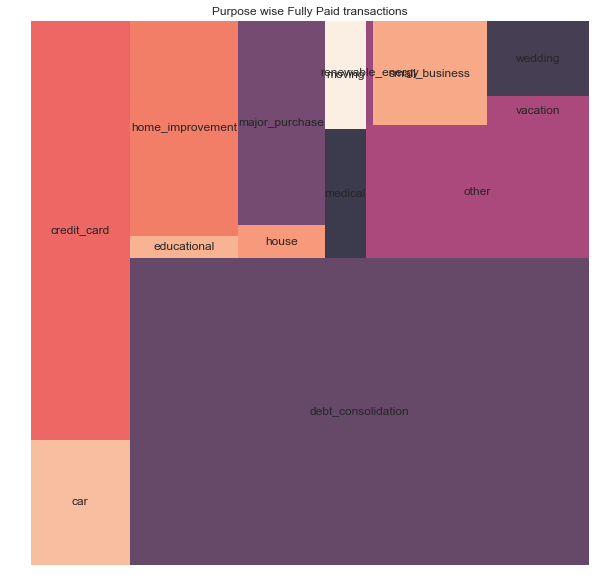

In [177]:
plt.figure(figsize=(10,10))
squarify.plot(sizes=countPaid_purpose.loan_status, label=countPaid_purpose.index,alpha=0.8 )
plt.title("Purpose wise Fully Paid transactions")
plt.axis('off')
# plt.show()


<b>We can see here major fully paid are in Debt consolidation and credit card but small business has small block compare to charged off small business block so we can say that small business has more charged off </b>

<h1><b>Debt-To-Income Ratio Analysis</b></h1> 

In [178]:
#Age bands
data['dti_band'] = pd.cut(data['dti'], 10)
data['dti_band'].value_counts()


(11.996, 14.995]    5910
(8.997, 11.996]     5472
(14.995, 17.994]    5426
(17.994, 20.993]    4938
(5.998, 8.997]      4759
(20.993, 23.992]    3971
(2.999, 5.998]      3603
(-0.03, 2.999]      2750
(23.992, 26.991]    1378
(26.991, 29.99]      318
Name: dti_band, dtype: int64

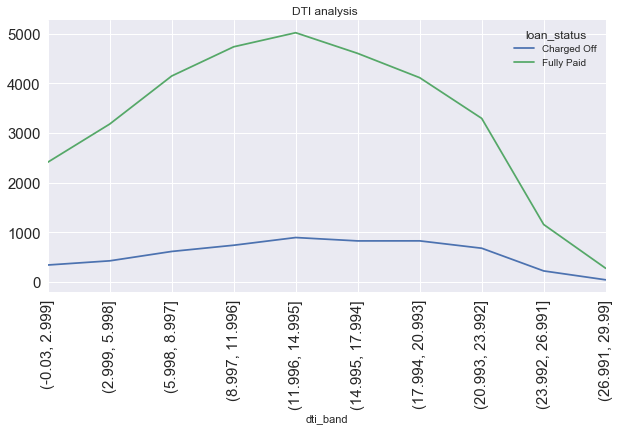

In [179]:
#We can relate loan amount to term, grade, installment, anuual income  
tb=pd.crosstab(index=data['dti_band'],columns=data['loan_status'])
tb.plot(figsize=(10,5),title='DTI analysis ',rot=90,fontsize=15)

<b>From above graph we can see that DTI between 11 to 14 has higher chances of getting defaulter.</b>


<h1><b>Verification status Analysis</b></h1>   

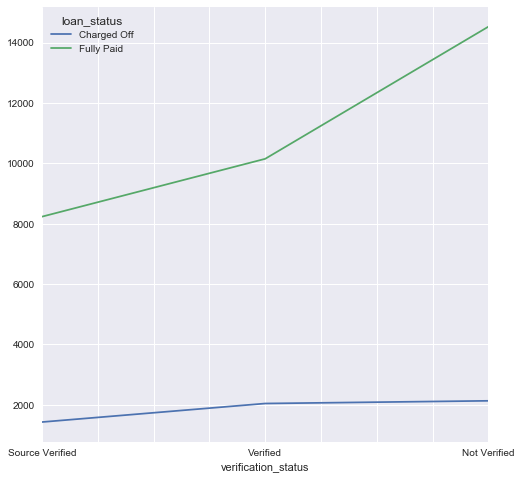

In [180]:
#lets see relations between verification_status and loan status
loan_home_table = pd.crosstab(index=data["verification_status"], 
                          columns=data["loan_status"]).sort_values('Fully Paid', ascending=True)

loan_home_table.plot(figsize=(8,8))

<b>We can see that source verified has lesser chance of getting defaulter than verified and not verified.similarly verified has lesser chance of getting defualter as compared to not verified</b>

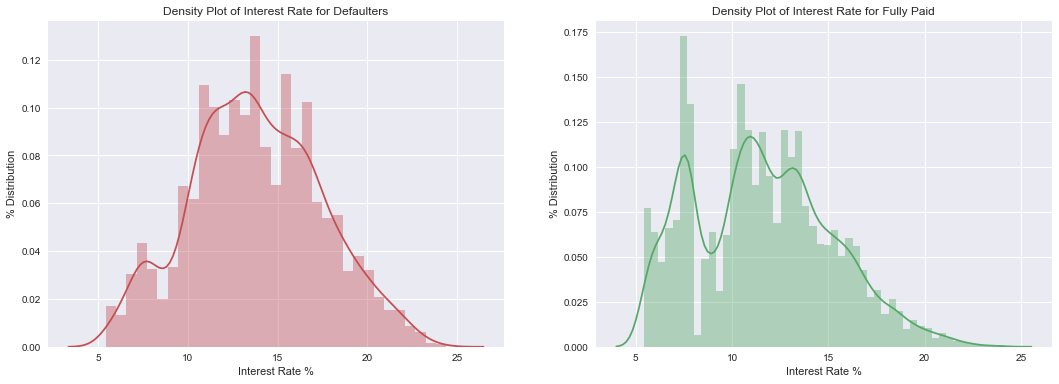

In [181]:
# data_default=data[data['loan_status']=='Charged Off']
# data_FullPaid=data[data['loan_status']=='Fully Paid']


fig, axs = plt.subplots(1,2,figsize=(18,6))
sns.distplot(data_default.int_rate, color="r",ax=axs[0])
axs[0].set(xlabel='Interest Rate %', 
       ylabel='% Distribution',title='Density Plot of Interest Rate for Defaulters')
sns.distplot(data_FullPaid.int_rate, color="g",ax=axs[1])
axs[1].set(xlabel='Interest Rate %', 
       ylabel='% Distribution',title='Density Plot of Interest Rate for Fully Paid')
plt.legend();
plt.show();


<b>We have ploted Density plot so we can see interest rates are more in defaulters applications.15 to 20 % slot there are more loans in defaulter case</b>

<h1><b>Proabability of Charged off Analysis</b></h1>  

In [182]:
data['loan_digit']=data.loan_status.replace({'Fully Paid' : 1,
                          'Charged Off' : 0,
                          'Current':2})
def plot_default_Probability(col_name,axs,i,j,sub):
    temp2 = pd.DataFrame(data.pivot_table(values='loan_digit',index=col_name,aggfunc=np.mean))    
    temp2['porbability of suceess']=temp2.loan_digit
    temp2['probability of default']= 1-temp2.loan_digit    
    temp2.drop('loan_digit',inplace=True,axis=1)
    if(sub==True):
        temp2.plot(kind='bar',ax=axs[i,j])        
    else:
        temp2.plot(kind='bar',figsize=(15,10))

<b>now we analyse things based on our previous conclusion
e.g. we know G grade person has more interest so what is the probability of person having grade G and become defaulter/fully paid?</b>

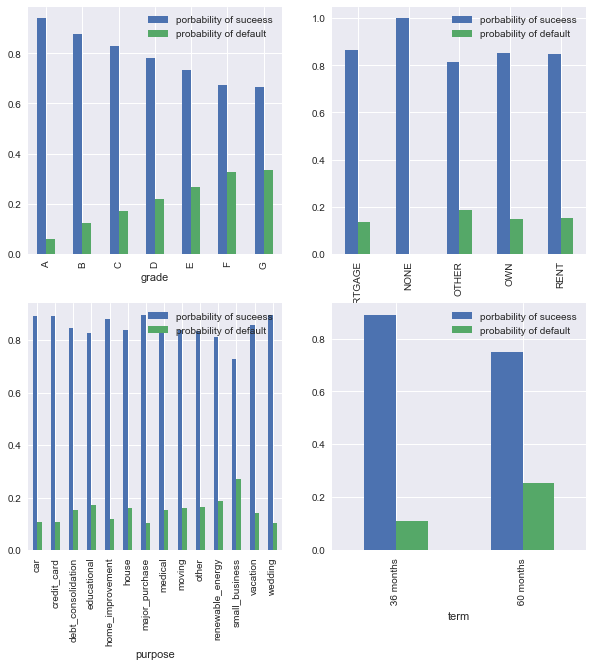

In [183]:
 
fig, axs = plt.subplots(2,2,figsize=(10,10)) 
 
plot_default_Probability('grade',axs,0,0,True)
plot_default_Probability('term',axs,1,1,True)
plot_default_Probability('purpose',axs,1,0,True)
plot_default_Probability('home_ownership',axs,0,1,True)

<b>1)we can observe each grade wise probability of becoming defaulter here(It means if person has grade A then very less probabality that he will become defaulter)<br>
2)probability of getting defaulter is high when we have 60 months period loan<br>
3)In loan purpose analysis we got small business has high chances here again we got same result that small business loans has high chances of defaulter.<br>
4)from proabablity we can say that mortgage,owner and rent all have almost equal proabablity to become defaulter.</b>

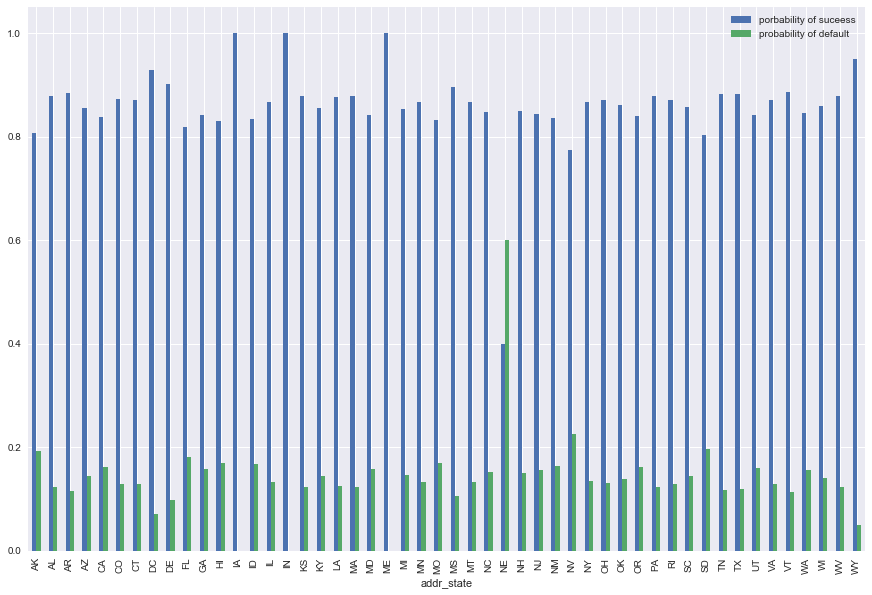

In [184]:
plot_default_Probability('addr_state',66,0,0,False)

<b>As compared to other states NE has highest probability of  getting defaulters</b>


In [185]:
#We have 3 distinct status of loan,let us convert it in numbers and then we can drop this column
#We can make Current status as our test set data
#let us replace the datasets
data['loan_status']=data.loan_status.replace({'Fully Paid' : 1,
                          'Charged Off' : 0,
                          'Current':2})

In [186]:

#With the help of label encoder, let us make home ownership and purpose
#and verification code numerics

categries= ['home_ownership', 'verification_status', 'purpose']
le = LabelEncoder()
for i in categries:
    data[i] = le.fit_transform(data[i]) 

In [187]:
#convert categoris in numbers
data['term']=data.term.apply(lambda c:c.replace('months',''))
data['term']=data['term'].apply(pd.to_numeric)

#replace in grade as well
data['grade']=data['grade'].replace({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})


<h1><b>Co-relation between features</b></h1>  

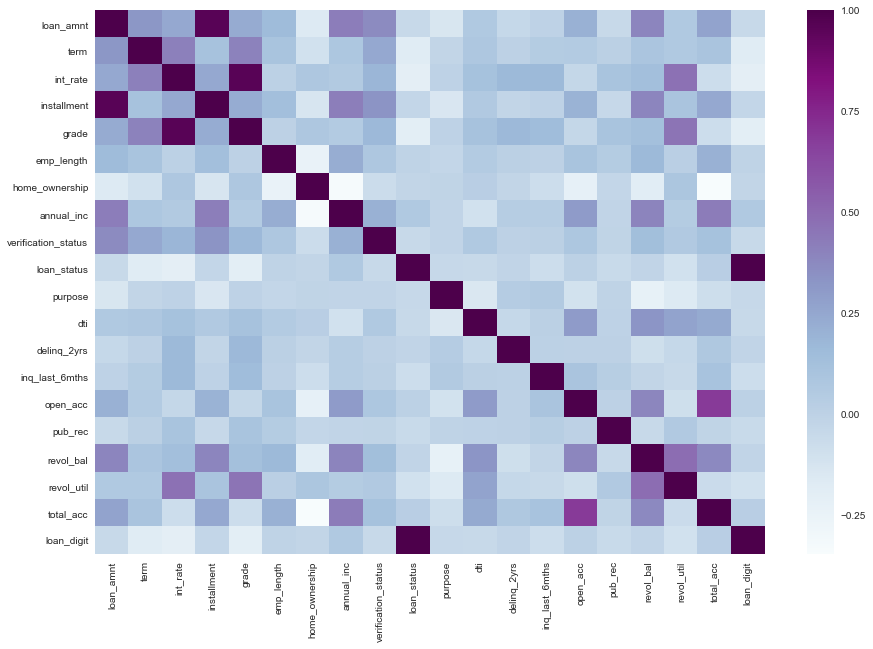

In [188]:
plt.figure(figsize=(15,10)) 
sns.heatmap(data=data.corr(method="spearman"),cmap="BuPu")

<b>#From above covarice heat map

#We can conclude that

1)Installment and Grade are very much related to loan_amount<br>
2)term of loan is related to emp_lenth<br>
3)home ownership does not seem to have much correlation<br>
4)annual income is related to loan amount<br>
5)intrest rate is related to grade<br>
6)installment is related to loan amount and annual income<br>
7)verification status and loan-amount is related<br>
8)dti and revol_util is related.<br>
9)mnths_since_last_delinq and mths_since_last_record is strongly related.<br>
10)mnths_since_last_delinq and public_record is strongly related.<br>
11)open_acc and total_acc are corelated.<br>
12)revol_bal and revol util are related.<br>
13)pub_rec_bankcruptices is very much related to public record and mnths_since_lasr_record.<br>
</b>

<h1><b>Final Conclusion</b></h1> 

<b>
From the above Analysis,We can include individual/combination of below variables in predict variable list.<br>
1)grade<br>
2)home_ownership<br>
3)annual_inc<br>
4)verification_status<br>
5)debt to income ratio<br>
6)purpose<br>
7)term<br>
8)loan amount<br>
</b>